In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/intro to ml dataset/train.csv")

In [ ]:
df.shape

(517788, 145)

In [ ]:
#drop the id and the member id which is not needed
df.drop(['id', 'member_id'], axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'hardship_last_payment_amount', 'disbursement_method',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'loan_status'],
      dtype='object', length=143)

In [ ]:
#take the columns which have unique values everywhere
# Get the number of unique values for each column
unique_values = df.nunique()

# Select columns with only one unique value
single_value_columns = unique_values[unique_values == 1].index.tolist()
single_value_columns

['pymnt_plan',
 'out_prncp',
 'out_prncp_inv',
 'policy_code',
 'hardship_flag',
 'hardship_type',
 'deferral_term',
 'hardship_length']

In [ ]:
df.drop(single_value_columns, axis=1, inplace=True)

In [ ]:
#adjusting the jupyter views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


In [ ]:
#dropping all the columns which has higher null percentages
null_counts = df.isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
print(len(sorted_null_counts[(sorted_null_counts/df.shape[0]) * 100 > 50].index))
cols = sorted_null_counts[(sorted_null_counts/df.shape[0]) * 100 > 50].index.to_list()

53


In [ ]:
df.drop(cols, axis=1, inplace=True)

In [ ]:
null_counts = df.isnull().sum()
max_null_count = null_counts.max()
max_null_column = null_counts[null_counts == max_null_count].index[0]

print(f"Maximum null count: {max_null_count}")
print(f"Column with maximum null count: {max_null_column}")


Maximum null count: 64883
Column with maximum null count: mths_since_recent_inq


In [ ]:
#Since there's so many types of employee types it doesn't caree so much information
print(len(df['emp_title'].unique())/df.shape[0] * 100)
df.drop(['emp_title'], inplace=True, axis=1)

33.830254853337664


In [ ]:
n_df = df.dropna().copy()
print(n_df.shape)
X = n_df.drop('loan_status', axis=1)
y = n_df['loan_status']

(381245, 81)


In [ ]:
# Get the numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get the categorical columns
categorical_cols = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Print the results
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percen

In [ ]:

from sklearn.feature_selection import mutual_info_classif

# Calculate the mutual information between each numerical feature and the target
mutual_information = mutual_info_classif(X[numerical_cols], y)

# Sort the features by their mutual information
sorted_features = sorted(zip(numerical_cols, mutual_information), key=lambda x: x[1], reverse=True)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'total_rec_prncp'),
  Text(1, 0, 'last_pymnt_amnt'),
  Text(2, 0, 'recoveries'),
  Text(3, 0, 'collection_recovery_fee'),
  Text(4, 0, 'total_pymnt'),
  Text(5, 0, 'total_pymnt_inv'),
  Text(6, 0, 'int_rate')])

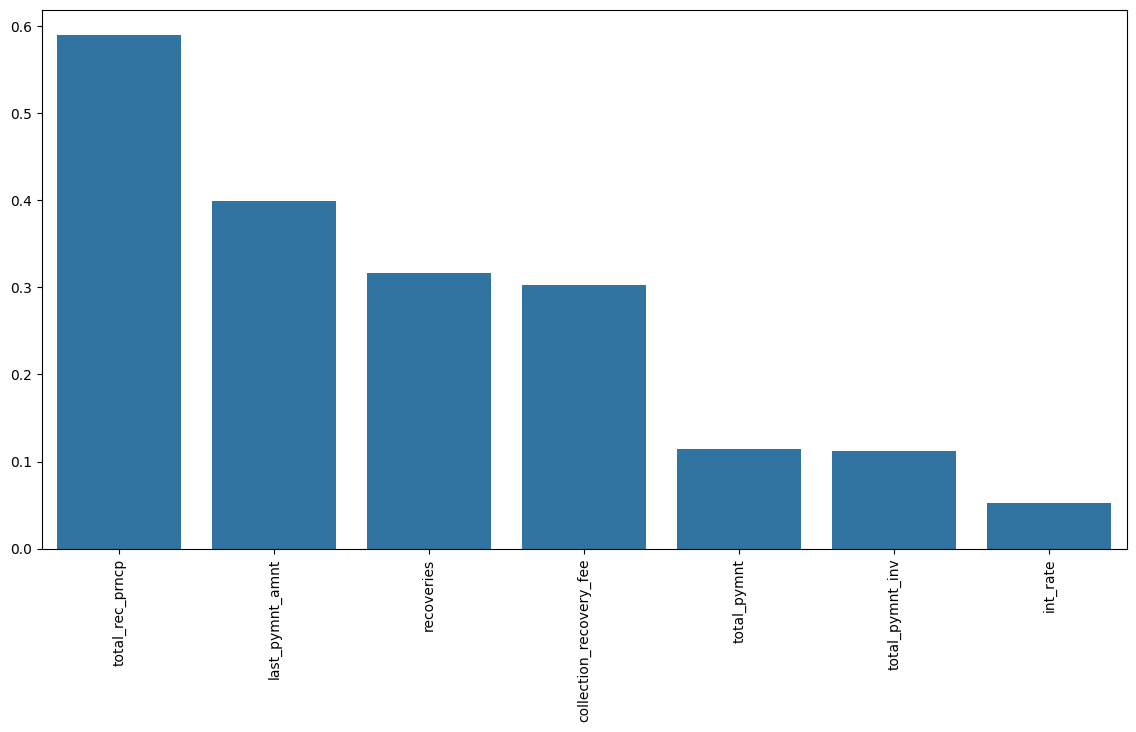

In [ ]:
#since the threshold is 0.05 https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00472-4
import seaborn as sns
from matplotlib import pyplot as plt
best_features = []

for x in sorted_features:
    if x[1] > 0.05:
        best_features.append(x)


feature_name =  [x[0] for x in best_features]
feature_val = [x[1] for x in best_features]

plt.figure(figsize=(14,7))
sns.barplot(x=feature_name, y=feature_val)
plt.xticks(rotation=90)


In [ ]:
#best numerical features
#reason why I have used infromation mutual information gain https://machinelearningmastery.com/feature-selection-with-numerical-input-data/#:~:text=Mutual%20Information%20Feature%20Selection,-Mutual%20information%20from&text=Mutual%20information%20is%20straightforward%20when,numerical%20input%20and%20categorical%20output.
feature_name

['total_rec_prncp',
 'last_pymnt_amnt',
 'recoveries',
 'collection_recovery_fee',
 'total_pymnt',
 'total_pymnt_inv',
 'int_rate']

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[numerical_cols], y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort features by importance in descending order
features = X[numerical_cols].columns
sorted_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

# Select the top 20 features
top_20_features = [feature for feature, importance in sorted_features[:20]]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61],
 [Text(0, 0, 'recoveries'),
  Text(1, 0, 'loan_amnt'),
  Text(2, 0, 'last_pymnt_amnt'),
  Text(3, 0, 'total_rec_prncp'),
  Text(4, 0, 'total_rec_int'),
  Text(5, 0, 'total_rec_late_fee'),
  Text(6, 0, 'funded_amnt_inv'),
  Text(7, 0, 'total_pymnt'),
  Text(8, 0, 'installment'),
  Text(9, 0, 'acc_open_past_24mths'),
  Text(10, 0, 'tax_liens'),
  Text(11, 0, 'total_pymnt_inv'),
  Text(12, 0, 'pub_rec'),
  Text(13, 0, 'num_tl_op_past_12m'),
  Text(14, 0, 'delinq_2yrs'),
  Text(15, 0, 'mths_since_recent_bc'),
  Text(16, 0, 'mo_sin_old_il_acct'),
  Text(17, 0, 'mo_sin_rcnt_tl'),
  Text(18, 0, 'total_bc_limit'),
  Text(19, 0, 'tot_cur_

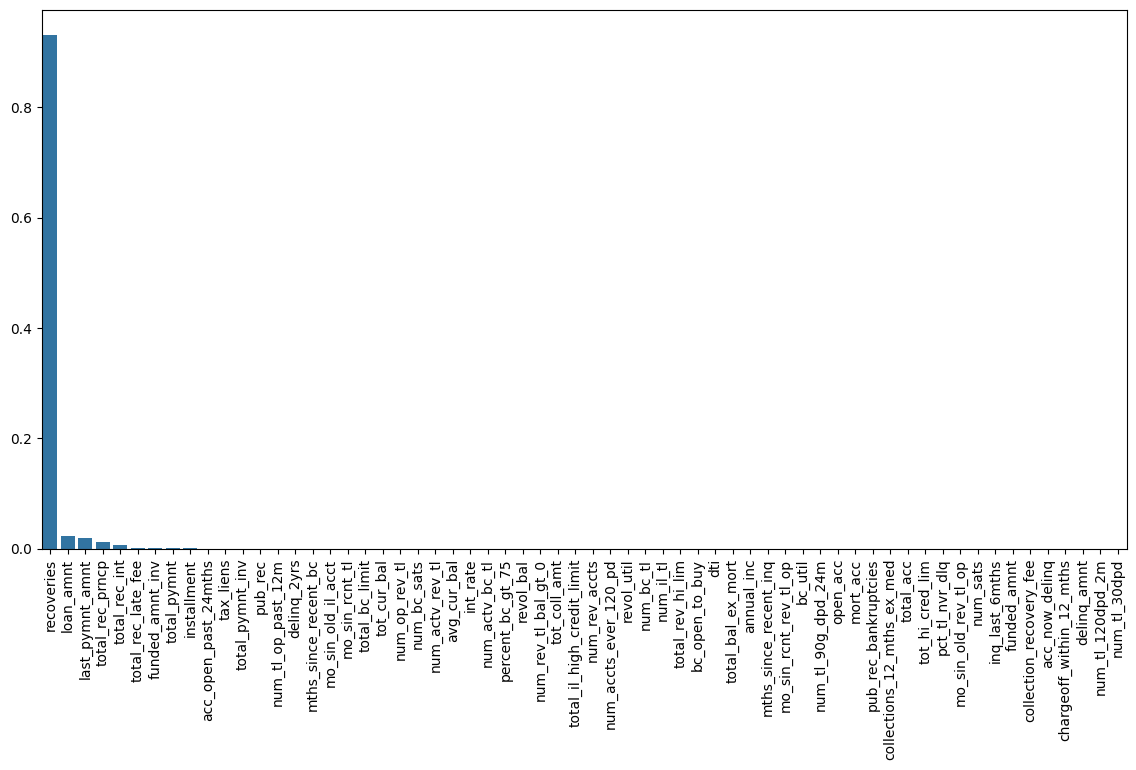

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
name = [n[0] for n in sorted_features]
val = [n[1] for n in sorted_features]
plt.figure(figsize=(14, 7))
sns.barplot(x=name, y=val)
plt.xticks(rotation=90)


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate the mutual information for each column with respect to the target
mutual_information = mutual_info_classif(X[numerical_cols], y)

# Create a DataFrame with the column names and mutual information scores
mi_df = pd.DataFrame({'column_name': numerical_cols, 'mutual_information': mutual_information})

# Sort the DataFrame by mutual information in descending order
mi_df = mi_df.sort_values(by='mutual_information', ascending=False)



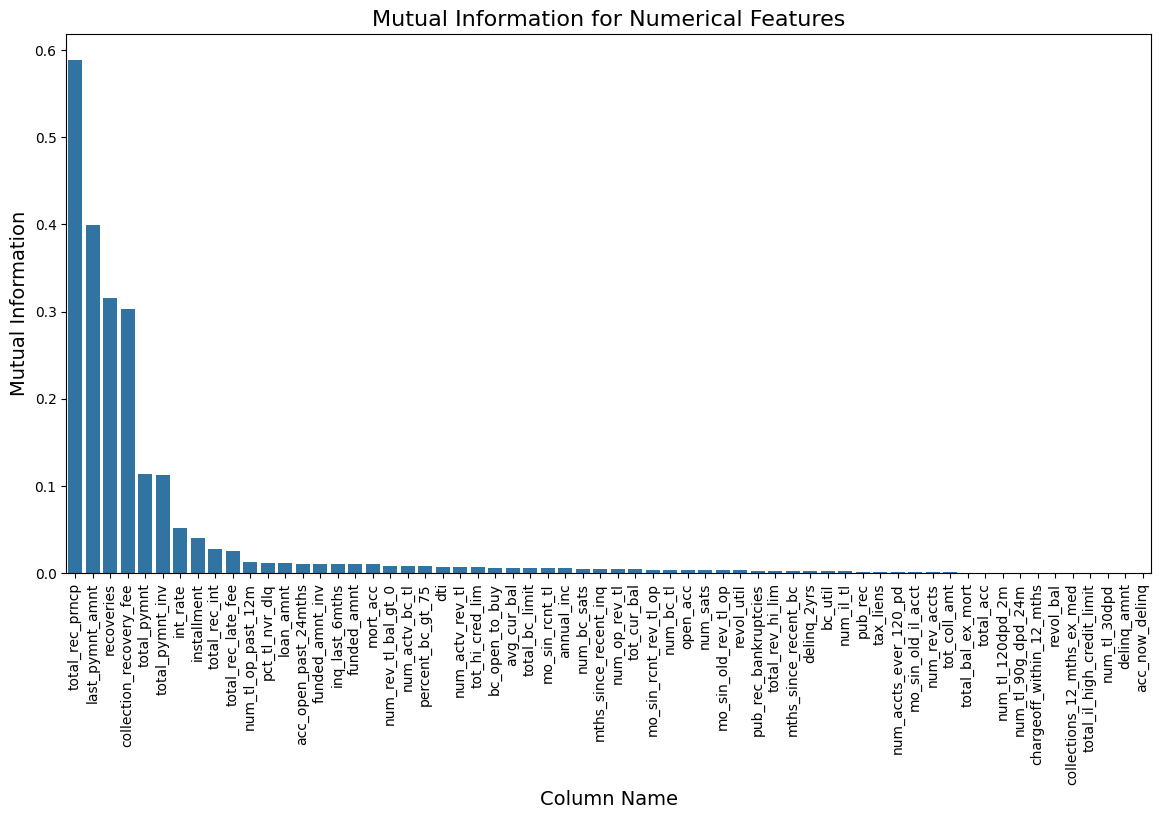

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
# Create a vertical bar chart using mi_df and matplotlib
plt.figure(figsize=(14, 7))
sns.barplot(mi_df, x='column_name', y='mutual_information')
plt.xlabel('Column Name', fontsize=14)
plt.ylabel('Mutual Information', fontsize=14)
plt.xticks(rotation=90)
plt.title('Mutual Information for Numerical Features', fontsize=16)
plt.show()


In [ ]:

mi_df[mi_df['mutual_information'] > 0.01]['column_name'].to_list()


['total_rec_prncp',
 'last_pymnt_amnt',
 'recoveries',
 'collection_recovery_fee',
 'total_pymnt',
 'total_pymnt_inv',
 'int_rate',
 'installment',
 'total_rec_int',
 'total_rec_late_fee',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'loan_amnt',
 'acc_open_past_24mths',
 'funded_amnt_inv',
 'inq_last_6mths',
 'funded_amnt',
 'mort_acc']

In [ ]:
X[categorical_cols] = X[categorical_cols].astype(str)

In [ ]:
X[categorical_cols].head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag
2,36 months,A,A4,4 years,MORTGAGE,Not Verified,Mar-2016,credit_card,Credit card refinancing,786xx,TX,Jul-1997,f,Oct-2017,Oct-2017,Individual,Cash,N
4,36 months,A,A4,< 1 year,MORTGAGE,Source Verified,Mar-2016,credit_card,Credit card refinancing,191xx,PA,Jan-2001,w,Dec-2017,Jul-2018,Individual,Cash,N
6,36 months,C,C1,< 1 year,MORTGAGE,Verified,May-2016,home_improvement,Home improvement,800xx,CO,Sep-2000,f,Dec-2018,Dec-2018,Individual,Cash,N
7,36 months,B,B2,10+ years,MORTGAGE,Verified,Mar-2016,debt_consolidation,Debt consolidation,390xx,MS,May-1984,f,Nov-2017,Feb-2019,Individual,Cash,N
8,36 months,B,B2,1 year,RENT,Not Verified,Jun-2015,debt_consolidation,Debt consolidation,054xx,VT,Aug-1994,w,Mar-2016,Jan-2018,Individual,Cash,N


In [ ]:
cat_df = X[categorical_cols].copy()

In [ ]:
y.shape

(381245,)

In [ ]:
cat_df.dropna(inplace=True)

Feature 0: 7882.622609
Feature 1: 21484.772589
Feature 2: 91953.216915
Feature 3: 148.730995
Feature 4: 2429.544288
Feature 5: 1516.804515
Feature 6: 24.518598
Feature 7: 315.478902
Feature 8: 95.909909
Feature 9: 13975.810621
Feature 10: 0.863103
Feature 11: 1836.031257
Feature 12: 0.617672
Feature 13: 222.333669
Feature 14: 25043.447065
Feature 15: 34.810196
Feature 16: 0.269856
Feature 17: 22477.227044


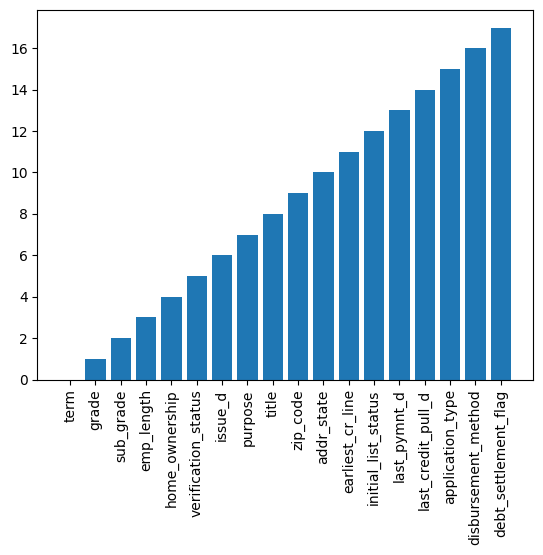

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# prepare input data
def prepare_inputs(X_train, X_test, cat_df):
 oe = OrdinalEncoder()
 oe.fit(cat_df)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

#
X_train, X_test, y_train, y_test = train_test_split(cat_df, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test, cat_df)

X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([c for c in cat_df.columns],[i for i in range(len(fs.scores_))])
plt.xticks(rotation=90)
pyplot.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

emp_length = {'< 1 year':0,
                '1 year':1,
              '2 years':2,
              '3 years':3,
              '5 years':4,
              '4 years':5,
              '6 years':6,
              '7 years':7,
              '8 years':8,
              '9 years':9,
              '10+ years':10}

def convert_debt(x):
    if x.strip() == "N":
        return 0
    return 1

def convert_term(x):
    if x.strip() == "36 months":
        return 0
    return 1

def convert_list(x):
    if x.strip() == "w":
        return 0
    return 1

def convert_binary_cols(df):
    df["debt_settlement_flag"] = df["debt_settlement_flag"].apply(convert_debt)
    df["term"] = df["term"].apply(convert_term)
    df["initial_list_status"] = df["initial_list_status"].apply(convert_list)


def own_encode(x):
    x = x.strip().lower()
    if x == "mortgage":
        return 0
    elif x == "rent":
        return 1
    elif x == "own":
        return 2
    else:
        return 3
verification_status = {"Not Verified":0,"Source Verified":1, "Verified":2}

cat_df = cat_df.replace({"emp_length":emp_length,
                         "verification_status" :verification_status
                        }
                        )

cat_df['home_ownership'] = cat_df['home_ownership'].apply(own_encode)
convert_binary_cols(cat_df)

# prompt: encode the 'sub_grade' whare A1 should get the highest while E4 should get the lowest
sorted_order = sorted(cat_df['sub_grade'].unique())


# Define the order of the sub-grades
sub_grade_order = sorted_order

# Convert the 'sub_grade' column to an array
sub_grade_array = np.array(cat_df['sub_grade']).reshape(-1, 1)

# Create an OrdinalEncoder object with the specified order
encoder = OrdinalEncoder(categories=[sub_grade_order])

# Encode the 'sub_grade' column
encoded_sub_grade = encoder.fit_transform(sub_grade_array)

# Replace the original 'sub_grade' column with the encoded one
cat_df['sub_grade'] = encoded_sub_grade




In [ ]:
cat_df["loan_status"] = y
#should be dropped the purpose, application_type,hardship_flag

In [ ]:
cat_df.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag,loan_status
2,0,A,3.0,5,0,0,Mar-2016,credit_card,Credit card refinancing,786xx,TX,Jul-1997,1,Oct-2017,Oct-2017,Individual,Cash,0,1
4,0,A,3.0,0,0,1,Mar-2016,credit_card,Credit card refinancing,191xx,PA,Jan-2001,0,Dec-2017,Jul-2018,Individual,Cash,0,1
6,0,C,10.0,0,0,2,May-2016,home_improvement,Home improvement,800xx,CO,Sep-2000,1,Dec-2018,Dec-2018,Individual,Cash,0,1
7,0,B,6.0,10,0,2,Mar-2016,debt_consolidation,Debt consolidation,390xx,MS,May-1984,1,Nov-2017,Feb-2019,Individual,Cash,0,1
8,0,B,6.0,1,1,0,Jun-2015,debt_consolidation,Debt consolidation,054xx,VT,Aug-1994,0,Mar-2016,Jan-2018,Individual,Cash,0,1


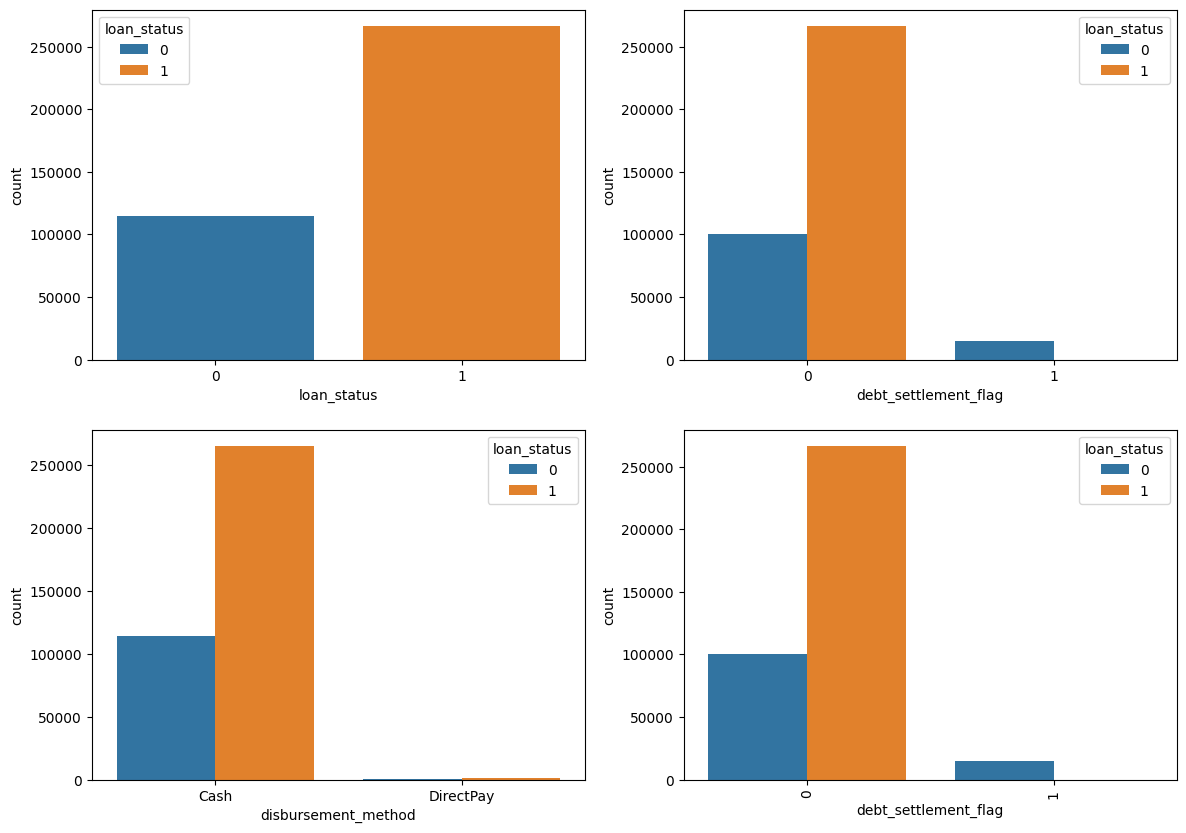

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(ax=axes[0,0], data=cat_df, x ="loan_status", hue="loan_status")
sns.countplot(ax=axes[0, 1], data=cat_df, x="debt_settlement_flag", hue="loan_status")
sns.countplot(ax=axes[1, 0], data=cat_df, x="disbursement_method", hue="loan_status")
sns.countplot(ax=axes[1, 1], data=cat_df, x="debt_settlement_flag", hue="loan_status")

plt.xticks(rotation=90)
plt.show()


In [ ]:
cat_df.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag,loan_status
2,0,A,3.0,5,0,0,Mar-2016,credit_card,Credit card refinancing,786xx,TX,Jul-1997,1,Oct-2017,Oct-2017,Individual,Cash,0,1
4,0,A,3.0,0,0,1,Mar-2016,credit_card,Credit card refinancing,191xx,PA,Jan-2001,0,Dec-2017,Jul-2018,Individual,Cash,0,1
6,0,C,10.0,0,0,2,May-2016,home_improvement,Home improvement,800xx,CO,Sep-2000,1,Dec-2018,Dec-2018,Individual,Cash,0,1
7,0,B,6.0,10,0,2,Mar-2016,debt_consolidation,Debt consolidation,390xx,MS,May-1984,1,Nov-2017,Feb-2019,Individual,Cash,0,1
8,0,B,6.0,1,1,0,Jun-2015,debt_consolidation,Debt consolidation,054xx,VT,Aug-1994,0,Mar-2016,Jan-2018,Individual,Cash,0,1


In [ ]:
#selected_categorical features "term","emp_length", "home_ownership", "verification_status","sub_grade", "debt_settlement_flag", "initial_list_status", "home_ownership"
#selected numerical features['total_rec_prncp','last_pymnt_amnt','recoveries','collection_recovery_fee','total_pymnt','total_pymnt_inv','int_rate']

In [ ]:
selected_features = ['total_rec_prncp','last_pymnt_amnt','recoveries','collection_recovery_fee','total_pymnt','total_pymnt_inv','int_rate', "term","emp_length", "home_ownership", "verification_status","sub_grade", "debt_settlement_flag", "initial_list_status", "loan_status"]
dataset = df[selected_features].copy().dropna()

In [ ]:
X_train = dataset.drop(['loan_status'], axis=1)
y_train = dataset['loan_status']

In [ ]:
X_train.head()

,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,int_rate,term,emp_length,home_ownership,verification_status,sub_grade,debt_settlement_flag,initial_list_status
0,14000.00,8611.87,0.0,0.000,15118.387808,15118.39,7.35,36 months,1 year,MORTGAGE,Not Verified,A4,N,f
2,5000.00,2662.94,0.0,0.000,5455.927032,5183.13,7.39,36 months,4 years,MORTGAGE,Not Verified,A4,N,f
4,10000.00,4753.53,0.0,0.000,10952.605895,10952.61,7.39,36 months,< 1 year,MORTGAGE,Source Verified,A4,N,w
5,224.87,172.01,1134.4,204.192,1474.400000,1474.40,14.46,36 months,5 years,MORTGAGE,Verified,C4,Y,w
6,14400.00,2809.30,0.0,0.000,17146.308688,17146.31,11.99,36 months,< 1 year,MORTGAGE,Verified,C1,N,f


In [ ]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

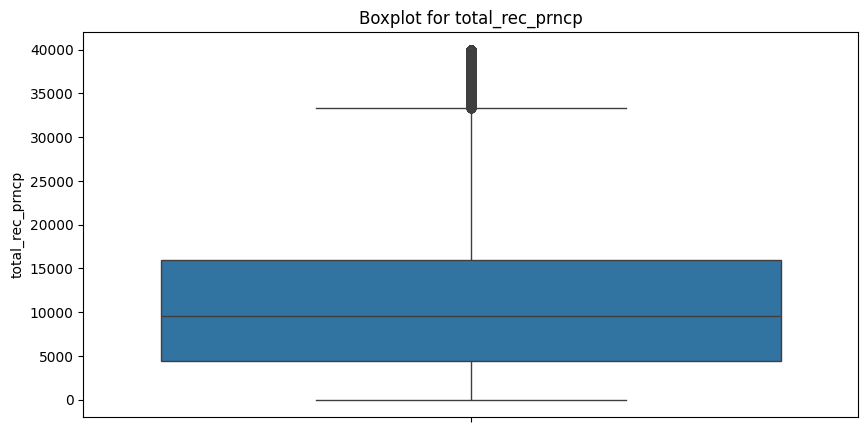

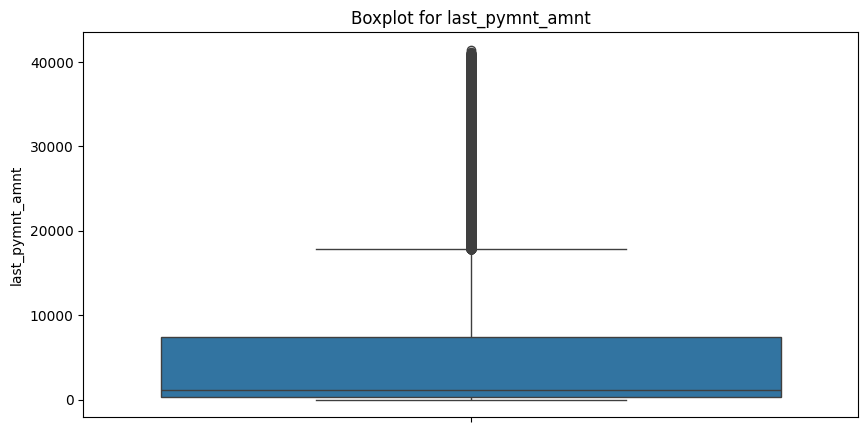

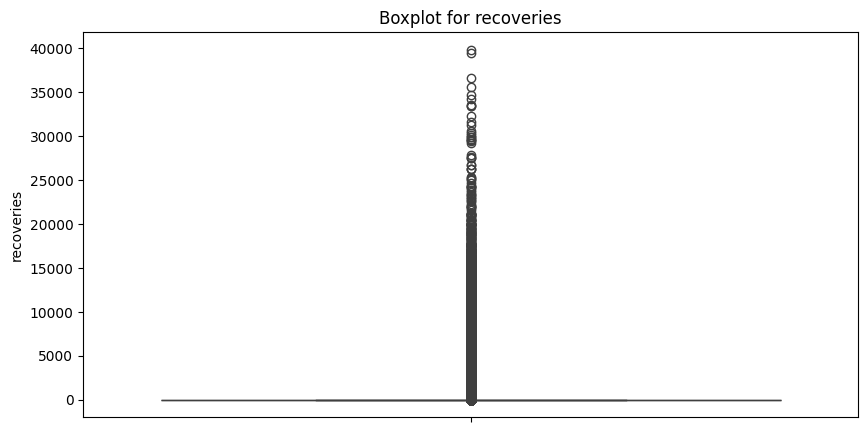

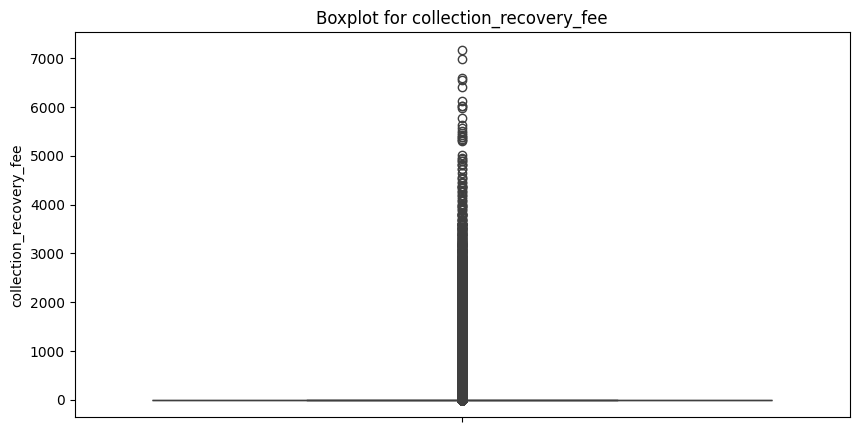

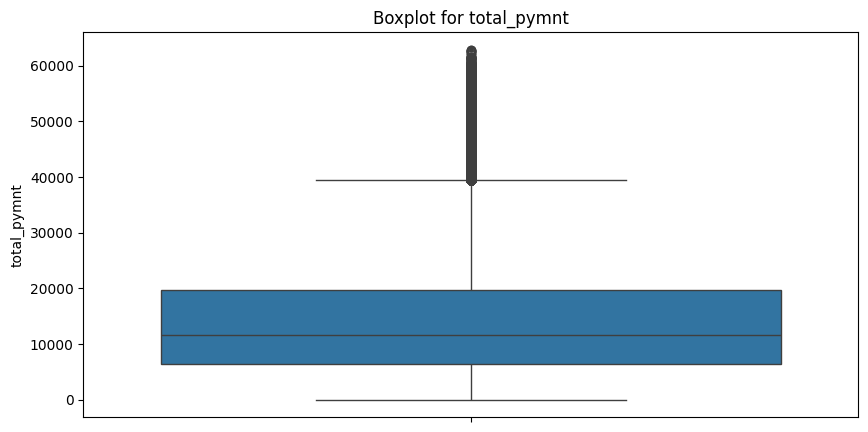

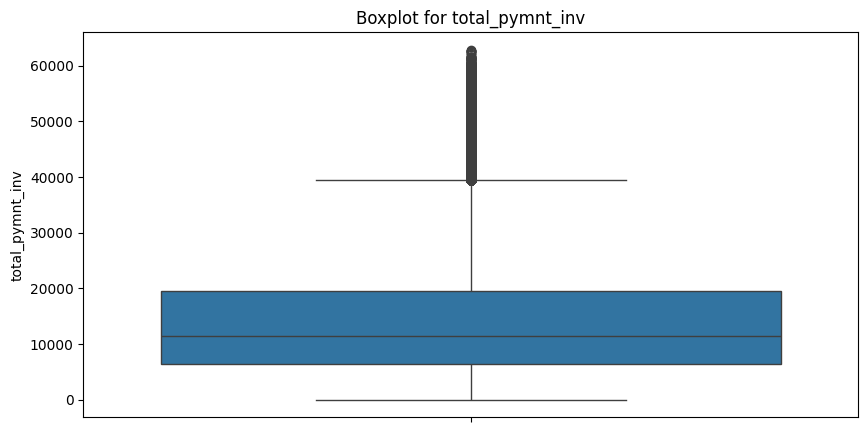

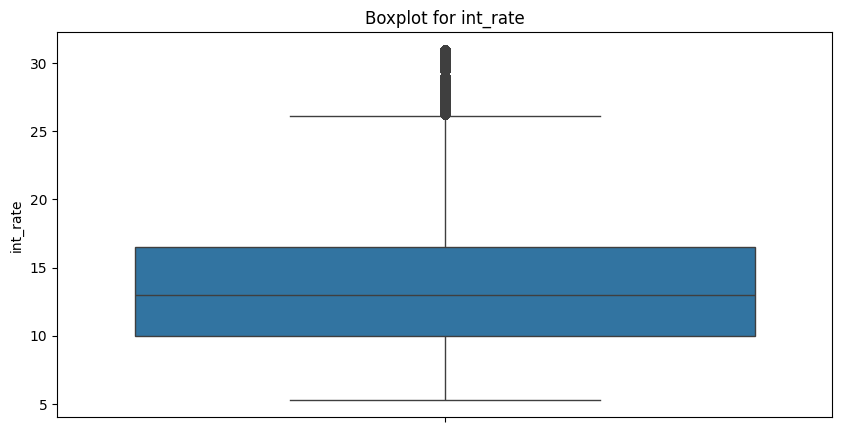

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(X_train[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [ ]:

import numpy as np
from scipy import stats

# Define the columns to be imputed
columns_to_impute = ['total_rec_prncp', 'int_rate']

# Loop through each column
for column in columns_to_impute:
  # Calculate the z-score for each value in the column
  z_scores = stats.zscore(X_train[column])

  # Identify outliers based on a threshold
  outliers = np.abs(z_scores) > 3

  # Replace outliers with the median value
  X_train[column][outliers] = np.median(X_train[column])


<ipython-input-40-ef126979afd3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column][outliers] = np.median(X_train[column])
<ipython-input-40-ef126979afd3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column][outliers] = np.median(X_train[column])


In [ ]:

sorted_order = sorted(X_train['sub_grade'].unique())
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Define the order of the sub-grades
sub_grade_order = sorted_order

# Convert the 'sub_grade' column to an array
sub_grade_array = np.array(X_train['sub_grade']).reshape(-1, 1)

# Create an OrdinalEncoder object with the specified order
encoder = OrdinalEncoder(categories=[sub_grade_order])

# Encode the 'sub_grade' column
encoded_sub_grade = encoder.fit_transform(sub_grade_array)

# Replace the original 'sub_grade' column with the encoded one
X_train['sub_grade'] = encoded_sub_grade


In [ ]:

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=['int64', 'float64']).columns.tolist()


In [ ]:
numerical_cols

['total_rec_prncp',
 'last_pymnt_amnt',
 'recoveries',
 'collection_recovery_fee',
 'total_pymnt',
 'total_pymnt_inv',
 'int_rate',
 'sub_grade']

In [ ]:

from sklearn.preprocessing import StandardScaler
# Get the numerical and categorical columns

scaler = StandardScaler()
X_train[numerical_cols + ["sub_grade"]] = scaler.fit_transform(X_train[numerical_cols+["sub_grade"]])



In [ ]:
X_train.head()

,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,int_rate,term,emp_length,home_ownership,verification_status,sub_grade,debt_settlement_flag,initial_list_status
0,0.317322,0.529366,-0.312021,-0.295502,0.090740,0.093037,-1.315212,36 months,1 year,MORTGAGE,Not Verified,-1.240198,N,f
2,-0.719878,-0.326824,-0.312021,-0.295502,-0.853651,-0.878225,-1.306576,36 months,4 years,MORTGAGE,Not Verified,-1.240198,N,f
4,-0.143656,-0.025939,-0.312021,-0.295502,-0.316416,-0.314206,-1.306576,36 months,< 1 year,MORTGAGE,Source Verified,-1.240198,N,w
5,-1.270185,-0.685327,0.667695,0.712037,-1.242798,-1.240787,0.219906,36 months,5 years,MORTGAGE,Verified,0.278274,Y,w
6,0.363420,-0.305759,-0.312021,-0.295502,0.288945,0.291285,-0.313391,36 months,< 1 year,MORTGAGE,Verified,-0.177268,N,f


In [ ]:
def own_encode(x):
    x = x.strip().lower()
    if x == "mortgage":
        return 0
    elif x == "rent":
        return 1
    elif x == "own":
        return 2
    else:
        return 3

X_train = X_train.replace(
                         {"emp_length":emp_length,
                         "verification_status" :verification_status
                         }
                         )

X_train['home_ownership'] = X_train['home_ownership'].apply(own_encode)
convert_binary_cols(X_train)

# prompt: encode the 'sub_grade' whare A1 should get the highest while E4 should get the lowest
sorted_order = sorted(X_train['sub_grade'].unique())


# Define the order of the sub-grades
sub_grade_order = sorted_order

# Convert the 'sub_grade' column to an array
sub_grade_array = np.array(X_train['sub_grade']).reshape(-1, 1)

# Create an OrdinalEncoder object with the specified order
encoder = OrdinalEncoder(categories=[sub_grade_order])

# Encode the 'sub_grade' column
encoded_sub_grade = encoder.fit_transform(sub_grade_array)

# Replace the original 'sub_grade' column with the encoded one
X_train['sub_grade'] = encoded_sub_grade

In [ ]:
X_train.head()

,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,int_rate,term,emp_length,home_ownership,verification_status,sub_grade,debt_settlement_flag,initial_list_status
0,0.317322,0.529366,-0.312021,-0.295502,0.090740,0.093037,-1.315212,0,1,0,0,3.0,0,1
2,-0.719878,-0.326824,-0.312021,-0.295502,-0.853651,-0.878225,-1.306576,0,5,0,0,3.0,0,1
4,-0.143656,-0.025939,-0.312021,-0.295502,-0.316416,-0.314206,-1.306576,0,0,0,1,3.0,0,0
5,-1.270185,-0.685327,0.667695,0.712037,-1.242798,-1.240787,0.219906,0,4,0,2,13.0,1,0
6,0.363420,-0.305759,-0.312021,-0.295502,0.288945,0.291285,-0.313391,0,0,0,2,10.0,0,1


In [ ]:
X = X_train.copy()

In [ ]:
print(X_train.shape)
print(y_train.shape)

(486488, 14)
(486488,)


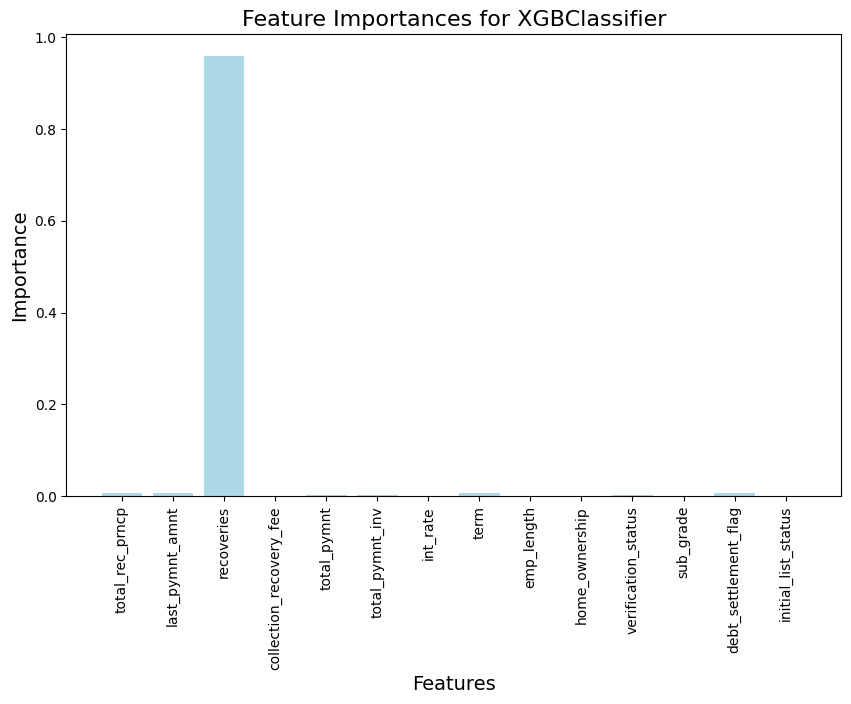

In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

# Train the XGBClassifier model
model = XGBClassifier()
model.fit(X_train, y_train)

# Plot the feature importances
importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='lightblue')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importances for XGBClassifier', fontsize=16)
plt.show()


In [ ]:
y_pred = model.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9945559417473309


F1 Score: 0.9934852369183961


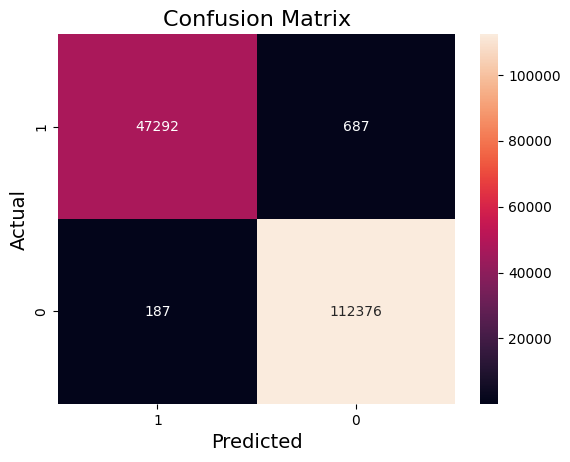

In [ ]:


from sklearn.metrics import f1_score, confusion_matrix
def getf1(y_test, y_pred):
    f1 = f1_score(y_test, y_pred, average='macro')
    print("F1 Score:", f1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=df['loan_status'].unique(), yticklabels=df['loan_status'].unique())
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

getf1(y_test, y_pred)

In [ ]:

test_df = pd.read_csv("/content/drive/MyDrive/intro to ml dataset/valid.csv")[selected_features].copy()

test_df.dropna(axis=0, inplace=True)


X_test = test_df.drop(['loan_status'], axis=1)
y_test = test_df['loan_status']


In [ ]:
X_test = X_test.replace(
                         {"emp_length":emp_length,
                         "verification_status" :verification_status
                         }
                         )

X_test['home_ownership'] = X_test['home_ownership'].apply(own_encode)
convert_binary_cols(X_test)






In [ ]:
sorted_order = sorted(df['sub_grade'].unique())

In [ ]:
# Create an OrdinalEncoder object with the specified order
encoder = OrdinalEncoder(categories=[sorted_order])
# Convert the 'sub_grade' column to an array
sub_grade_array = np.array(X_test['sub_grade']).reshape(-1, 1)

encoded_sub_grade = encoder.fit_transform(sub_grade_array)

X_test['sub_grade'] = encoded_sub_grade

In [ ]:
X_test[numerical_cols + ["sub_grade"]] = scaler.transform(X_test[numerical_cols+["sub_grade"]])

In [ ]:
y_pred = model.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9728131731131231


F1 Score: 0.9665735000475406


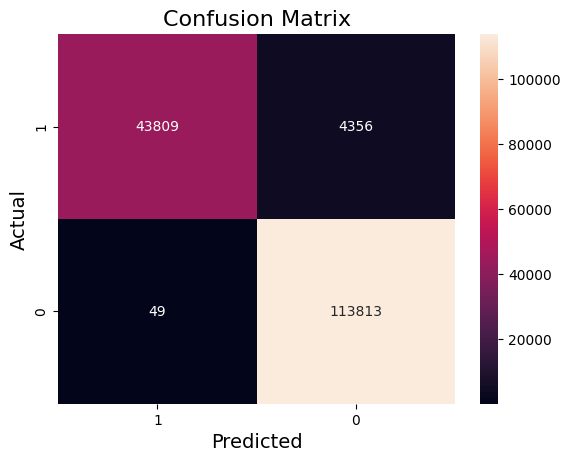

In [ ]:
import seaborn as sns

from sklearn.metrics import f1_score, confusion_matrix
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=df['loan_status'].unique(), yticklabels=df['loan_status'].unique())
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


In [ ]:
s_features = selected_features.copy()
s_features.remove("loan_status")
X_test = pd.read_csv("/content/drive/MyDrive/intro to ml dataset/X_test.csv")[s_features].copy()

test_df.dropna(axis=0, inplace=True)



X_test = X_test.replace(
                         {"emp_length":emp_length,
                         "verification_status" :verification_status
                         }
                         )

X_test['home_ownership'] = X_test['home_ownership'].apply(own_encode)
convert_binary_cols(X_test)
sorted_order = sorted(df['sub_grade'].unique())

sub_grade_array = np.array(X_test['sub_grade']).reshape(-1, 1)

encoded_sub_grade = encoder.fit_transform(sub_grade_array)
X_test['sub_grade'] = encoded_sub_grade
X_test[numerical_cols + ["sub_grade"]] = scaler.transform(X_test[numerical_cols+["sub_grade"]])

y_pred = model.predict(X_test)


In [ ]:
predicted_df = pd.DataFrame(data=X_test,
                            columns=s_features)
predicted_df['loan_status'] = y_pred

predicted_df.head()


,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,int_rate,term,emp_length,home_ownership,verification_status,sub_grade,debt_settlement_flag,initial_list_status,loan_status
0,-0.362620,0.463125,-0.312021,-0.295502,-0.590683,-0.588532,-0.425664,0,2.0,1,1,-0.329115,0,0,1
1,-1.216190,-0.661595,0.519718,0.559858,-1.194698,-1.192676,-0.097481,0,2.0,2,1,-0.025420,0,0,0
2,-0.207040,0.406336,-0.312021,-0.295502,-0.377385,-0.375189,0.049337,0,10.0,0,2,-0.329115,0,0,1
3,1.585011,-0.573862,-0.312021,-0.295502,1.770756,1.770254,0.874112,0,10.0,0,2,1.189358,0,1,1
4,-0.573695,-0.655311,0.850476,0.900009,-0.177984,-0.175745,0.334338,1,10.0,0,2,0.430121,0,0,0


In [ ]:
predicted_df.insert(0, 'loan_status', predicted_df.pop('loan_status'))
predicted_df.to_csv("predicted.csv")